In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv("IMDB_train.csv")

dataset.head()

,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0


In [3]:
print("Dataset Shape:", dataset.shape)
print("\nMissing Values:\n", dataset.isnull().sum())
print("\nClass Distribution:\n", dataset['label'].value_counts())

Dataset Shape: (36000, 2)

Missing Values:
 text     0
label    0
dtype: int64

Class Distribution:
 label
1    18056
0    17944
Name: count, dtype: int64


In [4]:
X = dataset['text']
y = dataset['label']

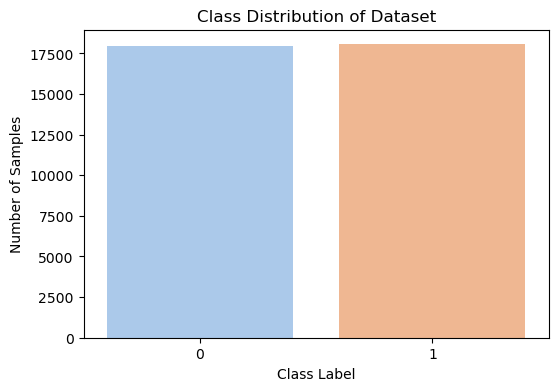

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, hue=y, palette="pastel", legend=False)

plt.title("Class Distribution of Dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")

plt.show()

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [7]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

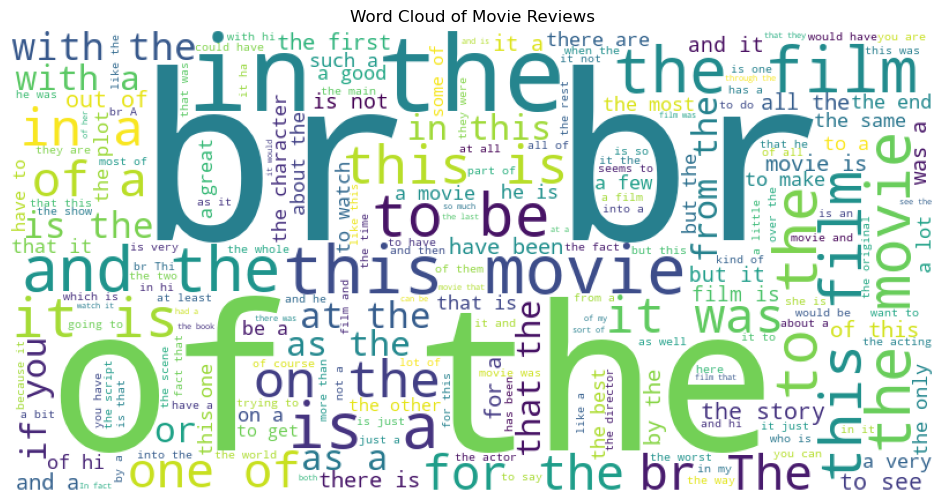

In [26]:
from wordcloud import WordCloud
X_text = dataset["text"].astype(str)

all_text = " ".join(X_text)  # X_text = list/Series of all reviews

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords="english"
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.to_image())
plt.axis("off")
plt.title("Word Cloud of Movie Reviews")
plt.show()

In [28]:
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [30]:
nb_preds = nb_model.predict(X_val_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_val, nb_preds))
print("\nClassification Report:\n", classification_report(y_val, nb_preds))

Naive Bayes Accuracy: 0.8518055555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3589
           1       0.85      0.86      0.85      3611

    accuracy                           0.85      7200
   macro avg       0.85      0.85      0.85      7200
weighted avg       0.85      0.85      0.85      7200



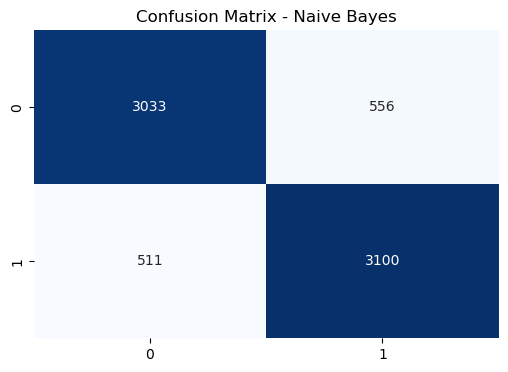

In [32]:
#Generate confusion matrix
cm = confusion_matrix(y_val, nb_preds)

#Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix - Naive Bayes")

plt.show()

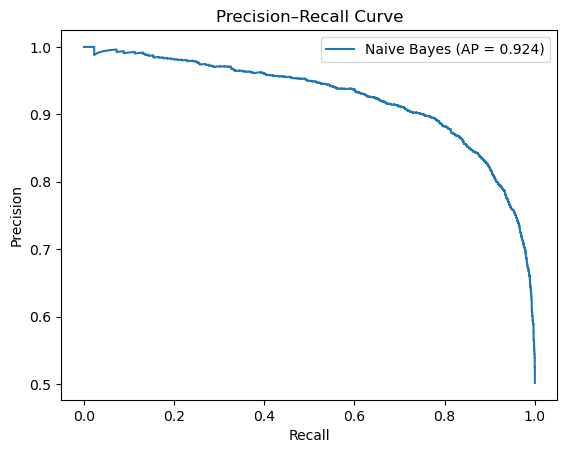

()

In [34]:
nb_probs = nb_model.predict_proba(X_val_tfidf)[:, 1]

# Precision–Recall curves
nb_prec, nb_rec, _ = precision_recall_curve(y_val, nb_probs)

# Average Precision 
nb_ap = average_precision_score(y_val, nb_probs)

plt.figure()
plt.plot(nb_rec, nb_prec, label=f"Naive Bayes (AP = {nb_ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()
()

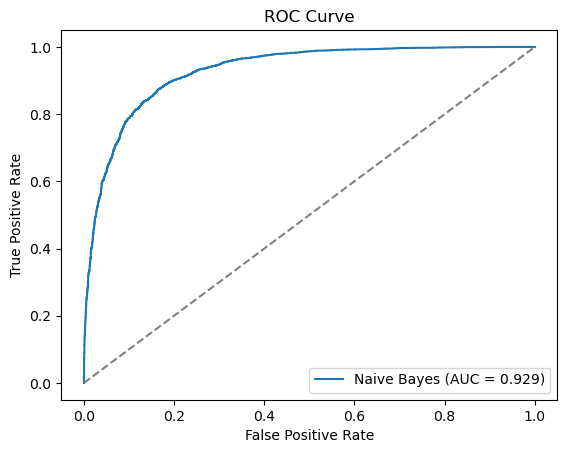

In [36]:
# ROC curve values
nb_fpr, nb_tpr, _ = roc_curve(y_val, nb_probs)

# AUC scores
nb_auc = roc_auc_score(y_val, nb_probs)

plt.figure()
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [38]:
#Logistic 
lr_model = LogisticRegression(
    max_iter=1000,
    solver="liblinear"
)

lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [39]:
lr_preds = lr_model.predict(X_val_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))
print("\nClassification Report:\n", classification_report(y_val, lr_preds))

Logistic Regression Accuracy: 0.8827777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3589
           1       0.88      0.89      0.88      3611

    accuracy                           0.88      7200
   macro avg       0.88      0.88      0.88      7200
weighted avg       0.88      0.88      0.88      7200



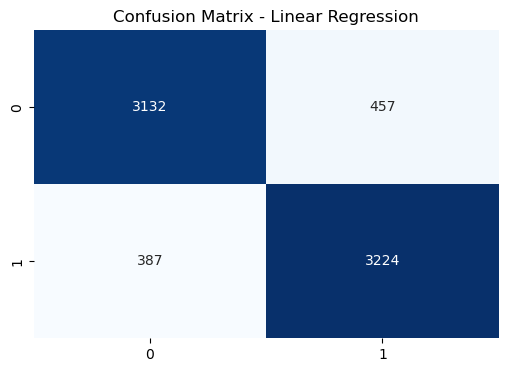

In [42]:
#Generate confusion matrix
cm = confusion_matrix(y_val, lr_preds)

#Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix - Linear Regression")

plt.show()

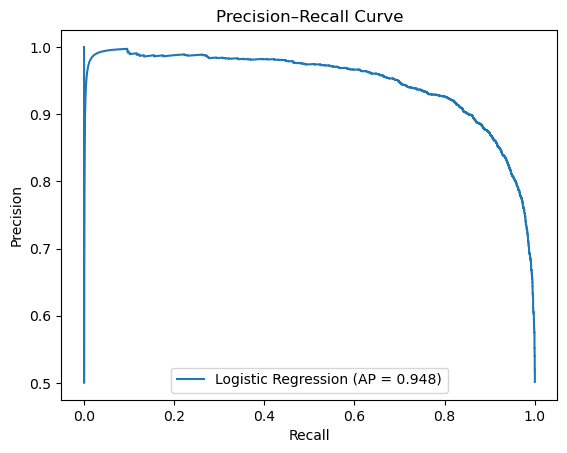

()

In [44]:
lr_probs = lr_model.predict_proba(X_val_tfidf)[:, 1]

# Precision–Recall curves
lr_prec, lr_rec, _ = precision_recall_curve(y_val, lr_probs)

# Average Precision 
lr_ap = average_precision_score(y_val, lr_probs)

plt.figure()
plt.plot(lr_rec, lr_prec, label=f"Logistic Regression (AP = {lr_ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()
()

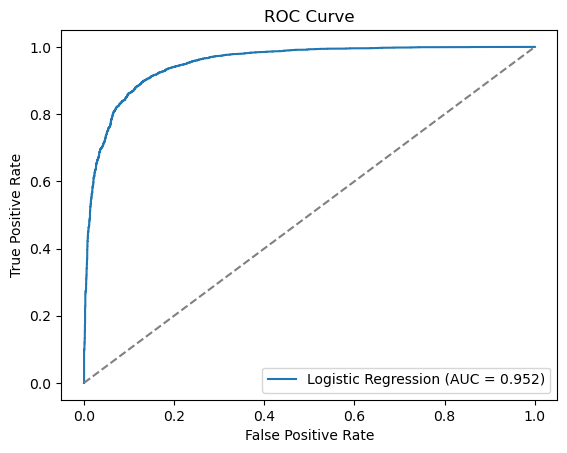

In [46]:
# ROC curve values
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)

# AUC scores
lr_auc = roc_auc_score(y_val, lr_probs)

plt.figure()
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [48]:
comparison = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_val, nb_preds),
        accuracy_score(y_val, lr_preds)
    ]
})

comparison

,Model,Accuracy
0,Naive Bayes,0.851806
1,Logistic Regression,0.882778


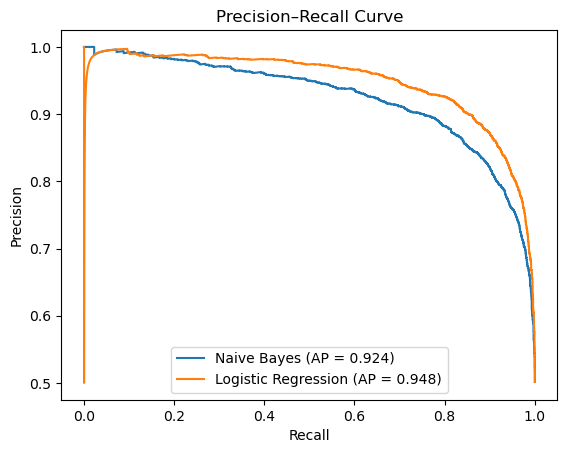

()

In [50]:
#Precision recall comparison
plt.figure()
plt.plot(nb_rec, nb_prec, label=f"Naive Bayes (AP = {nb_ap:.3f})")
plt.plot(lr_rec, lr_prec, label=f"Logistic Regression (AP = {lr_ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()
()

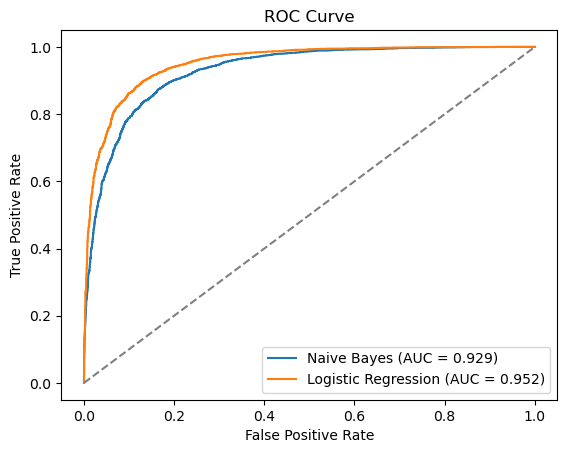

In [52]:
# ROC curve comparison
plt.figure()
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.3f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [54]:
def predict_review(text):
    vec = tfidf.transform([text])
    nb = nb_model.predict(vec)[0]
    lr = lr_model.predict(vec)[0]

    return {
        "Naive Bayes": "Positive" if nb == 1 else "Negative",
        "Logistic Regression": "Positive" if lr == 1 else "Negative"
    }


# --- User interaction ---
user_review = input("Please enter a movie review:\n\n")

predictions = predict_review(user_review)

print("\nSentiment Prediction Results:")
for model, sentiment in predictions.items():
    print(f"{model}: {sentiment}")


Please enter a movie review:

 It wasn't terrible, but I'm not sure I would recommend it unless you're already a fan of the genre.



Sentiment Prediction Results:
Naive Bayes: Negative
Logistic Regression: Negative
